## The Higgs Boson

### The Standard Model

The standard model is a framework based in quantum field theory used in physics to explain the fundamental particles and the most of the forces (it doesn't explain the gravity) and predicts almost all known particles. 

In the standard model, particles and forces are explained b the properties of quantum fields known as gauge inveriance and symmetries. Forces for instance are saied to be transmited by particles named as gauge bosons. 

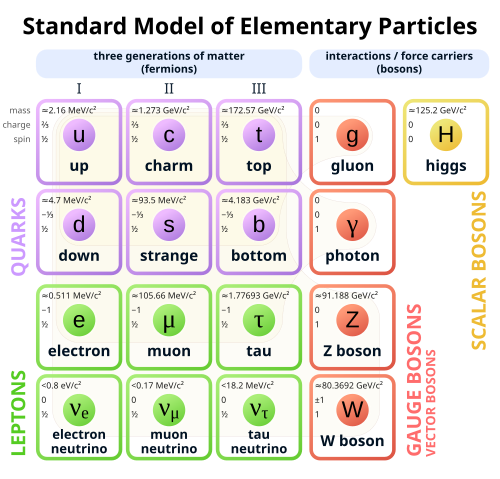

In [2]:
import uproot
import numpy as np
import awkward as ak
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Following the same process to calculate the invariant mass of Z in the Lepton-Invariant-Mass-Distribution.ipynb 
# file. We now compute the invariant mass of the Higgs Boson H for the signal data

file = uproot.open("/tf/Higgs-Boson-LHC-Collision-Detector/sigfcc_350.root")
tree = file["Delphes"]

# Since the process we're studying implies a Higgs Boson hich decays into a jet and a bjet we have to check first
# the data we'll be working with. 
tree["Jet"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Jet                  | int32_t                  | AsDtype('>i4')                
Jet.fUniqueID        | uint32_t[]               | AsJagged(AsDtype('>u4'))
Jet.fBits            | uint32_t[]               | AsJagged(AsDtype('>u4'))
Jet.PT               | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Eta              | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Phi              | float[]                  | AsJagged(AsDtype('>f4'))
Jet.T                | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Mass             | float[]                  | AsJagged(AsDtype('>f4'))
Jet.DeltaEta         | float[]                  | AsJagged(AsDtype('>f4'))
Jet.DeltaPhi         | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Flavor           | uint32_t[]               | AsJagged(AsDtype('>u4'))
Jet.Fla

In [34]:
flavor = tree["Jet/Jet.Flavor"].array(library = "ak")
f_flatten = ak.flatten(flavor)
f_flatten = np.array(f_flatten)

# We first check the data contained in the flavor
fla = {"jet_flavor": f_flatten}
fla = pd.DataFrame(fla)

fla.value_counts()

jet_flavor
0             568316
3             280962
5             273774
21            112173
2               8920
1               8169
4               6938
Name: count, dtype: int64

According to the information provided in the Delphes docummentation and Delphes github repository, the jet flavor (computed with the Simple $\Delta R$ highest-flavor match) works as following:

| Particle | PDG |
| -------- | --- |
| gluon    | 21  |
| d        | 1   |
| u        | 2   |
| s        | 3   |
| c        | 4   |
| b        | 5   |

Since we'll be working with b and s bosons we have to filter the data of our interest.

In [73]:
# Again
flavor = tree["Jet/Jet.Flavor"].array(library = "ak")
# And we do this to get the info about the p_t, eta and phi
pt = tree["Jet/Jet.PT"].array(library = "ak")
eta = tree["Jet/Jet.Eta"].array(library = "ak")
phi = tree["Jet/Jet.Phi"].array(library = "ak")
charge = tree["Jet/Jet.Charge"].array(library = "ak")


# We'll be proceding as follows
# First we have to check in which events we have b and s bosons:

# This will be the cleaned data for the b boson detections:
fla_b = []
pt_b = []
eta_b = []
phi_b = []
cha_b = []

# This will be the cleaned data for the s boson detections:
fla_s = []
pt_s = []
eta_s = []
phi_s = []
cha_s = []

event_b = []
event_s = []

for i in range(len(flavor)):
    n = len(flavor[i])
    for j in range(n):
        for k in range(n):
            if flavor[i,j] == 3 and flavor[i,k] == 5:
                fla_s.append(flavor[i,j])
                pt_s.append(pt[i,j])
                eta_s.append(eta[i,j])
                phi_s.append(phi[i,j])
                cha_s.append(charge[i,j])
                
                fla_b.append(flavor[i,k])
                pt_b.append(pt[i,k])
                eta_b.append(eta[i,k])
                phi_b.append(phi[i,k])
                cha_b.append(charge[i,k])
                
                event_s.append(i)
                event_b.append(i)
                
pt_b = np.array(pt_b)
eta_b = np.array(eta_b)
phi_b = np.array(phi_b)
cha_b = np.array(cha_b)

pt_s = np.array(pt_s)
eta_s = np.array(eta_s)
phi_s = np.array(phi_s)
cha_s = np.array(cha_s)

fla_b = np.array(fla_b)
fla_s = np.array(fla_s)
                
event_b = np.array(event_b)
event_s = np.array(event_s)

In [74]:
b_ = {
    "pt_b": pt_b,
    "eta_b": eta_b,
    "phi_b": phi_b,
    "cha_b": cha_b,
    "fla_b": fla_b,
    "event": event_b
}

b_data = pd.DataFrame(b_)
path = "/tf/Higgs-Boson-LHC-Collision-Detector/b_boson_data.csv"
b_data.to_csv(path, index = False)

s_ = {
    "pt_s": pt_s,
    "eta_s": eta_s,
    "phi_s": phi_s,
    "cha_s": cha_s,
    "fla_s": fla_s,
    "event": event_s
}

s_data = pd.DataFrame(s_)
path = "/tf/Higgs-Boson-LHC-Collision-Detector/s_boson_data.csv"
s_data.to_csv(path, index = False)

In [75]:
df1 = pd.read_csv('/tf/Higgs-Boson-LHC-Collision-Detector/b_boson_data.csv')
df1.head()

,pt_b,eta_b,phi_b,cha_b,fla_b,event
0,36.597230,-1.709504,-1.596112,-1,5,1
1,127.212680,0.348251,-3.009968,-1,5,3
2,79.471170,0.793922,-3.048927,1,5,6
3,11.906924,-1.482367,-0.247148,1,5,11
4,71.595894,1.037406,-2.305773,-1,5,13


In [76]:
df2 = pd.read_csv("/tf/Higgs-Boson-LHC-Collision-Detector/s_boson_data.csv")
df2.head()

,pt_s,eta_s,phi_s,cha_s,fla_s,event
0,64.256520,-0.113773,2.964018,1,3,1
1,39.575764,-0.525154,1.704656,1,3,3
2,53.803616,-0.340002,1.934983,1,3,6
3,137.516330,0.033779,-1.903679,-1,3,11
4,53.172295,-0.705184,-2.506598,1,3,13


In [77]:
# We see that since all events coincide we can create a general dataframe 

df = pd.merge(df1, df2, on = "event")
df

,pt_b,eta_b,phi_b,cha_b,fla_b,event,pt_s,eta_s,phi_s,cha_s,fla_s
0,36.597230,-1.709504,-1.596112,-1,5,1,64.256520,-0.113773,2.964018,1,3
1,127.212680,0.348251,-3.009968,-1,5,3,39.575764,-0.525154,1.704656,1,3
2,79.471170,0.793922,-3.048927,1,5,6,53.803616,-0.340002,1.934983,1,3
3,11.906924,-1.482367,-0.247148,1,5,11,137.516330,0.033779,-1.903679,-1,3
4,71.595894,1.037406,-2.305773,-1,5,13,53.172295,-0.705184,-2.506598,1,3
...,...,...,...,...,...,...,...,...,...,...,...
194193,1.177215,0.209245,0.715637,1,5,499985,70.364450,0.502756,-0.979702,1,3
194194,36.077423,0.361513,-1.391407,-1,5,499987,133.338700,0.078550,0.211215,-1,3
194195,30.233929,1.217508,2.766293,1,5,499989,117.212790,0.433038,0.247911,-1,3
194196,126.120060,0.476279,2.286425,-1,5,499991,54.714360,0.091891,-2.202783,1,3


In [79]:
# We can now compute the proper calculations in order to get then the Invariant Mass
# We calculatee the momentum p, which is:

df["m1_x"] = df["pt_b"]*np.cos(df["phi_b"])
df["m1_y"] = df["pt_b"]*np.sin(df["phi_b"])
df["m1_z"] = df["pt_b"]*np.sinh(df["eta_b"])

df["m2_x"] = df["pt_s"]*np.cos(df["phi_s"])
df["m2_y"] = df["pt_s"]*np.sin(df["phi_s"])
df["m2_z"] = df["pt_s"]*np.sinh(df["eta_s"])

# Then we can calculate the invariant mass

# For the muons:
df["m_inv"] = np.sqrt((np.sqrt(df["m1_x"]**2 + df["m1_y"]**2 + df["m1_z"]**2) + 
                             np.sqrt(df["m2_x"]**2 + df["m2_y"]**2 + df["m2_z"]**2))**2 - 
                            (df["m1_x"] + df["m2_x"])**2 - (df["m1_y"] + df["m2_y"])**2 -
                            (df["m1_z"] + df["m2_z"])**2 )

df.head()

,pt_b,eta_b,phi_b,cha_b,fla_b,event,pt_s,eta_s,phi_s,cha_s,fla_s,m1_x,m1_y,m1_z,m2_x,m2_y,m2_z,m_inv
0,36.597230,-1.709504,-1.596112,-1,5,1,64.256520,-0.113773,2.964018,1,3,-0.926396,-36.585503,-97.810933,-63.246087,11.350457,-7.326451,113.084658
1,127.212680,0.348251,-3.009968,-1,5,3,39.575764,-0.525154,1.704656,1,3,-126.112287,-16.696017,45.202920,-5.281800,39.221725,-21.751913,118.901370
2,79.471170,0.793922,-3.048927,1,5,6,53.803616,-0.340002,1.934983,1,3,-79.130210,-7.353689,69.934106,-19.164294,50.274834,-18.647830,111.224328
3,11.906924,-1.482367,-0.247148,1,5,11,137.516330,0.033779,-1.903679,-1,3,11.545122,-2.912902,-24.863179,-44.936086,-129.967262,4.646089,89.987059
4,71.595894,1.037406,-2.305773,-1,5,13,53.172295,-0.705184,-2.506598,1,3,-48.010075,-53.113132,88.331987,-42.807694,-31.540360,-40.682184,122.275208


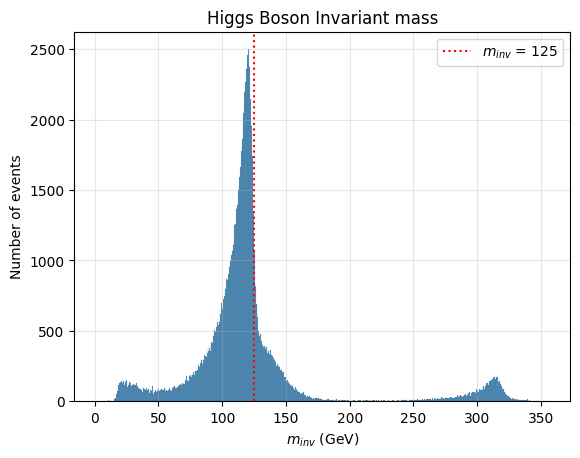

In [90]:
# And we check the distribution

sns.histplot(df["m_inv"], bins = 1000, kde = False)
plt.axvline(x = 125, color = "red", linestyle = ':', label = r"$m_{inv}$ = 125")
plt.xlabel(r"$m_{inv}$ (GeV)")
plt.ylabel("Number of events")
plt.title(r"Higgs Boson Invariant mass")
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()